LOGISTIC REGRESSION : ASSIGNMENT 1

Reading and uploading files

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [ ]:
df = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

Q1. EDA to figure out which variables have direct and clear impact on employee retention



left
0    11428
1     3571
Name: count, dtype: int64


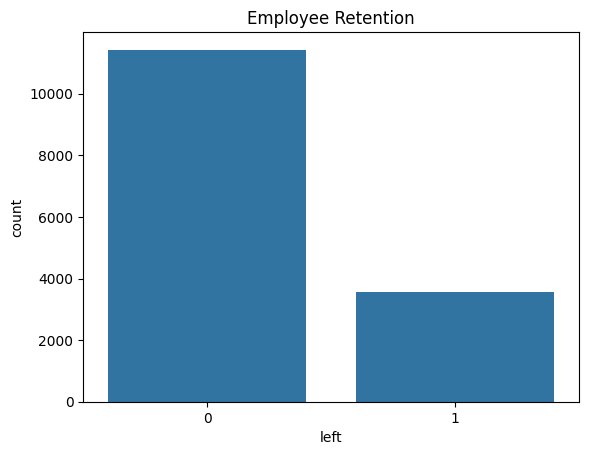

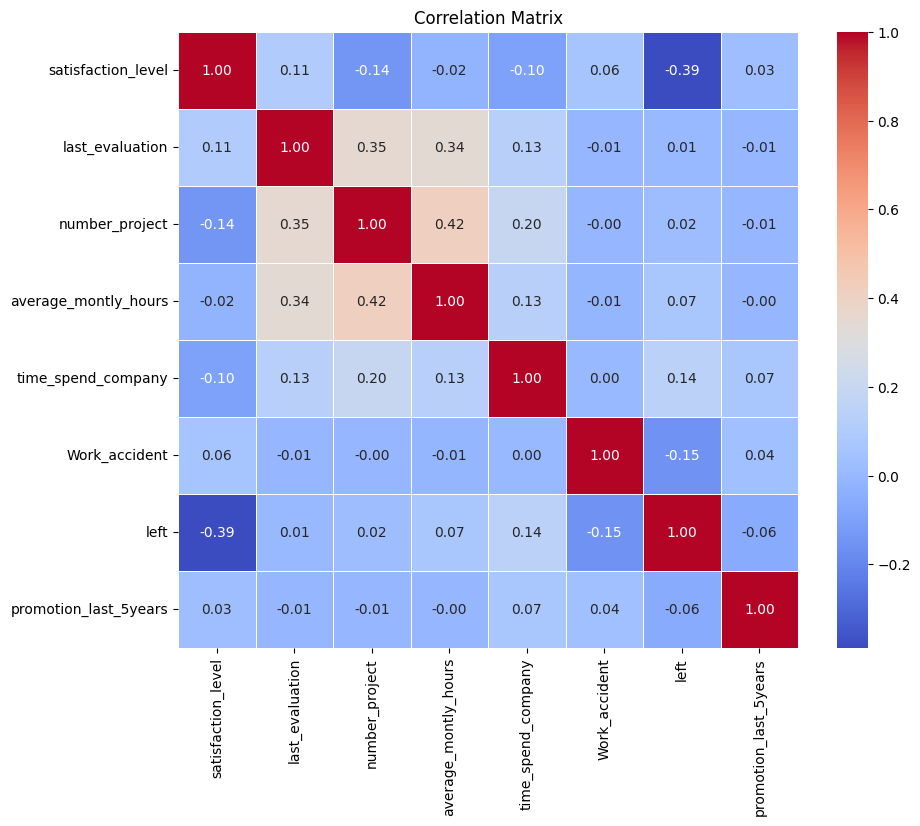

In [ ]:
import seaborn as sns

# Retention analysis
print(df['left'].value_counts())  # 1: Left, 0: Stayed
sns.countplot(x='left', data=df)
plt.title("Employee Retention")
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Q2. Plotting bar charts showing empact of employee salaries on retention

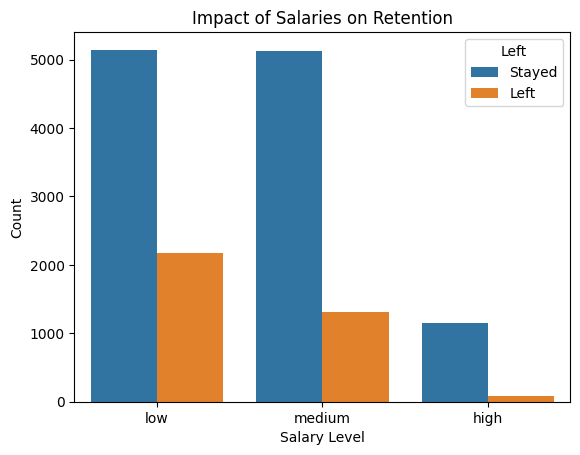

In [ ]:
# Salary vs Retention
sns.countplot(x='salary', hue='left', data=df)
plt.title("Impact of Salaries on Retention")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

Q3. Plotting bar charts showing empact of department on retention

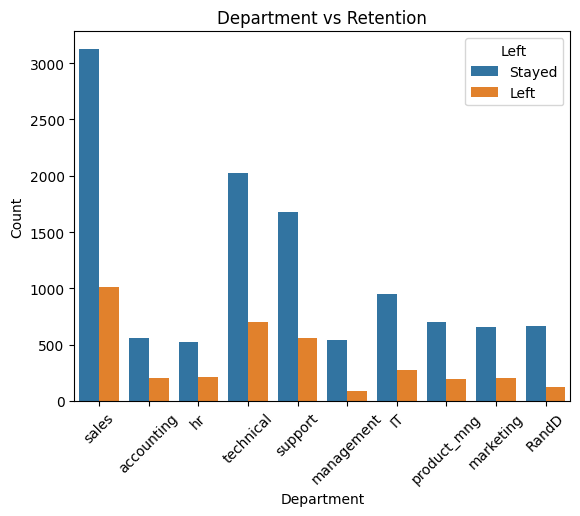

In [ ]:
# Department vs Retention
sns.countplot(x='Department', hue='left', data=df)
plt.title("Department vs Retention")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

Q4.Logistic regression model

Variables that were narrowed down last_evaluation,	number_project,	average_montly_hours,	time_spend_company

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep (1).csv


In [ ]:
df = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

In [ ]:
df.shape

(14999, 10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company']], df.left , train_size = 0.8)

In [ ]:
X_train

last_evaluation  number_project  average_montly_hours  \
3570              0.60               3                   270   
4704              0.76               3                   134   
14899             0.81               7                   244   
5946              0.84               4                   200   
5792              0.68               6                   154   
...                ...             ...                   ...   
297               0.52               2                   147   
6900              0.74               4                   222   
12288             0.91               5                   232   
13890             0.87               3                   223   
3023              0.68               4                   168   

       time_spend_company  
3570                    3  
4704                    2  
14899                   5  
5946                    2  
5792                    5  
...                   ...  
297                     3  
6900                    2  
12288                   5  
13890                   7  
3023                    3  

[11999 rows x 4 columns]

In [ ]:
X_test

last_evaluation  number_project  average_montly_hours  \
4466              0.95               5                   254   
9472              0.86               3                   173   
14217             0.77               6                   247   
10399             0.54               5                   203   
2593              0.90               3                   256   
...                ...             ...                   ...   
6837              0.97               5                   145   
2225              0.51               3                   234   
12537             0.45               2                   154   
13478             0.62               3                   110   
14807             0.84               5                   222   

       time_spend_company  
4466                    2  
9472                    3  
14217                   4  
10399                   2  
2593                    4  
...                   ...  
6837                    2  
2225                    3  
12537                   3  
13478                   3  
14807                   5  

[3000 rows x 4 columns]

In [ ]:
y_train

3570     0
4704     0
14899    1
5946     0
5792     0
        ..
297      1
6900     0
12288    1
13890    0
3023     0
Name: left, Length: 11999, dtype: int64

In [ ]:
y_test

4466     0
9472     0
14217    1
10399    0
2593     0
        ..
6837     0
2225     0
12537    1
13478    0
14807    1
Name: left, Length: 3000, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)
#TRAINING THE DATA WITH THIS FXN

LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test, y_test)

0.7486666666666667

In [ ]:
model.predict_proba(X_test)

array([[0.81276979, 0.18723021],
       [0.80710196, 0.19289804],
       [0.7347043 , 0.2652957 ],
       ...,
       [0.78539183, 0.21460817],
       [0.82615383, 0.17384617],
       [0.70731436, 0.29268564]])

Q5. Measure the accuracy of the model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 74.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2287
           1       0.00      0.00      0.00       713

    accuracy                           0.75      3000
   macro avg       0.38      0.49      0.43      3000
weighted avg       0.58      0.75      0.65      3000



GRADIENT DESCENT WITH MACHINE LEARNUNG : ASSIGNMENT 2

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance_data (1).csv to insurance_data (1).csv


In [ ]:
df = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
df

age  affordibility  bought_insurance
0    22              1                 0
1    25              0                 0
2    47              1                 1
3    52              0                 0
4    46              1                 1
5    56              1                 1
6    55              0                 0
7    60              0                 1
8    62              1                 1
9    61              1                 1
10   18              1                 0
11   28              1                 0
12   27              0                 0
13   29              0                 0
14   49              1                 1
15   55              1                 1
16   25              0                 1
17   58              1                 1
18   19              0                 0
19   18              1                 0
20   21              1                 0
21   26              0                 0
22   40              1                 1
23   45              1                 1
24   50              1                 1
25   54              1                 1
26   23              1                 0
27   46              1                 0

In [ ]:
df.shape

(28, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], df.bought_insurance, train_size = 0.8)

In [ ]:
X_train

age  affordibility
23   45              1
3    52              0
26   23              1
10   18              1
12   27              0
20   21              1
0    22              1
9    61              1
16   25              0
6    55              0
7    60              0
14   49              1
1    25              0
24   50              1
5    56              1
21   26              0
13   29              0
19   18              1
11   28              1
17   58              1
18   19              0
22   40              1

In [ ]:
X_test

age  affordibility
2    47              1
27   46              1
4    46              1
8    62              1
15   55              1
25   54              1

In [ ]:
y_train

23    1
3     0
26    0
10    0
12    0
20    0
0     0
9     1
16    1
6     0
7     1
14    1
1     0
24    1
5     1
21    0
13    0
19    0
11    0
17    1
18    0
22    1
Name: bought_insurance, dtype: int64

In [ ]:
y_test

2     1
27    0
4     1
8     1
15    1
25    1
Name: bought_insurance, dtype: int64

In [ ]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [ ]:
# Add intercept term (bias) to the data (for gradient descent calculations)
X_train_scaled['intercept'] = 1
X_test_scaled['intercept'] = 1

In [ ]:
# Convert data to numpy arrays for easier manipulation
X_train = X_train_scaled[['intercept', 'age', 'affordibility']].values
y_train = y_train.values
X_test = X_test_scaled[['intercept', 'age', 'affordibility']].values
y_test = y_test.values

In [ ]:
# Initialize weights (random small values)
weights = np.zeros(X_train.shape[1])


In [ ]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Define the cost function (binary cross-entropy)
def cost_function(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

In [ ]:
# Gradient descent function
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        # Calculate the predictions
        predictions = sigmoid(np.dot(X, weights))

        # Compute the gradient
        gradients = (1/m) * np.dot(X.T, (predictions - y))

        # Update the weights
        weights -= learning_rate * gradients

        # Record the cost every 100 epochs (for visualization)
        if epoch % 100 == 0:
            cost_history.append(cost_function(X, y, weights))

    return weights, cost_history

In [ ]:
# Set hyperparameters for gradient descent
learning_rate = 0.01
epochs = 5000

In [ ]:
# Perform gradient descent to find the optimal weights
weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

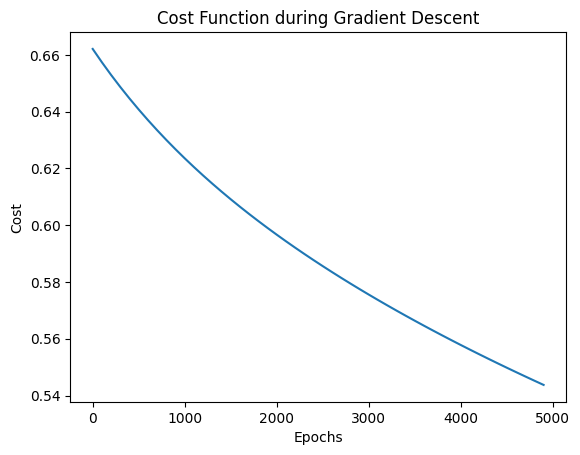

In [ ]:
# Plot the cost function over epochs to check convergence
plt.plot(range(0, epochs, 100), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function during Gradient Descent')
plt.show()


In [ ]:
# Evaluate the model on the test set
def predict(X, weights):
    predictions = sigmoid(np.dot(X, weights))
    return [1 if i >= 0.5 else 0 for i in predictions]

In [ ]:
# Make predictions on the test set
predictions = predict(X_test, weights)

In [ ]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.33%


LOST FXN / COST FXN : ASSIGNMENT 3

Implement mean squared error (or MSE) in two ways

1.Without using numpy (i.e. using plain python)

2.With the use of numpy

1.Without using numpy (i.e. using plain python)

In [ ]:
import numpy as np

In [ ]:
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

Implement Mean Squared Error

In [ ]:
def mse(y_predicted, y_true):
    total_error = 0
    for yp, yt in zip(y_predicted, y_true):
        total_error += (yp - yt)**2
    print("Total error is:",total_error)
    mse = total_error/len(y_predicted)
    print("Mean squared error is:",mse)
    return mse

In [ ]:
mse(y_predicted, y_true)

Total error is: 1.83
Mean squared error is: 0.366


0.366

2.With the use of numpy

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_predicted)

In [ ]:
mse

0.366

In [ ]:
np.mean(mse)

0.366

In [ ]:
def mse_np(y_predicted, y_true):
    return np.mean(mse)

In [ ]:
mse_np(y_predicted, y_true)

0.366

COST & LOST FUNCTION ON INSURANCE : ASSIGNMENT 4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file
# Assume the uploaded file's name is 'insurance_data (1).csv'
df = pd.read_csv(list(uploaded.keys())[0])  # Read the file using the uploaded name

Saving insurance_data (1).csv to insurance_data (1) (2).csv


In [ ]:
X = df[['age', 'affordibility']].values
y = df[['bought_insurance']].values

In [ ]:
X[:, 0] = X[:, 0] / 100  # Normalize the 'age' column

In [ ]:
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term as the first column

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def gradient_descent(X, y, lr=0.1, epochs=100):
    m, n = X.shape  # m: number of samples, n: number of features (including bias)
    weights = np.zeros(n).reshape(-1, 1)  # Initialize weights to zeros (n, 1)
    losses = []

    # Ensure y is reshaped correctly
    y = y.reshape(-1, 1)

    for epoch in range(epochs):
        # Linear combination
        z = np.dot(X, weights)  # Shape: (m, 1)
        # Sigmoid activation
        y_pred = 1 / (1 + np.exp(-z))  # Shape: (m, 1)
        # Compute gradient
        gradient = np.dot(X.T, (y_pred - y)) / m  # Shape: (n, 1)
        # Update weights
        weights -= lr * gradient
        # Compute loss
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))  # Binary cross-entropy loss
        losses.append(loss)

        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, losses

In [ ]:
# Run gradient descent
learning_rate = 0.1
epochs = 100
weights, losses = gradient_descent(X, y, lr=learning_rate, epochs=epochs)

# Print final weights
print("Trained Weights (including bias):", weights)

Epoch 0, Loss: 0.6931
Epoch 10, Loss: 0.6862
Epoch 20, Loss: 0.6808
Epoch 30, Loss: 0.6763
Epoch 40, Loss: 0.6722
Epoch 50, Loss: 0.6685
Epoch 60, Loss: 0.6652
Epoch 70, Loss: 0.6621
Epoch 80, Loss: 0.6592
Epoch 90, Loss: 0.6565
Trained Weights (including bias): [[-0.25495847]
 [ 0.        ]
 [ 0.55159276]]


In [ ]:
# Calculate predictions
z = np.dot(X, weights)
y_pred = sigmoid(z)
y_pred_classes = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = np.mean(y_pred_classes == y)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6786


In [ ]:
y_predicted = np.array(y_pred_classes)
y_true = np.array(y)

In [ ]:
def mae(y_predicted, y_true):
    total_error = 0
    for yp, yt in zip(y_predicted, y_true):
        total_error += abs(yp - yt)
    print("Total error is:",total_error)
    mae = total_error/len(y_predicted)
    print("Mean absolute error is:",mae)
    return mae

In [ ]:
mae(y_predicted, y_true)

Total error is: [9]
Mean absolute error is: [0.32142857]


array([0.32142857])

In [ ]:
np.abs(y_predicted-y_true)

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [ ]:
def mae_np(y_predicted, y_true):
    return np.mean(np.abs(y_predicted-y_true))

In [ ]:
mae_np(y_predicted, y_true)

np.float64(0.32142857142857145)

In [ ]:
np.log([0])

<ipython-input-38-faee82fd9f21>:1: RuntimeWarning: divide by zero encountered in log
  np.log([0])


array([-inf])

In [ ]:
epsilon = 1e-15

In [ ]:
np.log([1e-15])

array([-34.53877639])

In [ ]:
y_predicted

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
y_predicted_new = [max(i,epsilon) for i in y_predicted]
y_predicted_new

[array([1]),
 1e-15,
 array([1]),
 1e-15,
 array([1]),
 array([1]),
 1e-15,
 1e-15,
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 1e-15,
 1e-15,
 array([1]),
 array([1]),
 1e-15,
 array([1]),
 1e-15,
 array([1]),
 array([1]),
 1e-15,
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1])]

In [ ]:
1-epsilon

0.999999999999999

In [ ]:
y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
y_predicted_new = np.array(y_predicted_new)
y_predicted_new

array([1.e+00, 1.e-15, 1.e+00, 1.e-15, 1.e+00, 1.e+00, 1.e-15, 1.e-15,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e-15, 1.e-15, 1.e+00, 1.e+00,
       1.e-15, 1.e+00, 1.e-15, 1.e+00, 1.e+00, 1.e-15, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00])

In [ ]:
np.log(y_predicted_new)

array([-9.99200722e-16, -3.45387764e+01, -9.99200722e-16, -3.45387764e+01,
       -9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16, -9.99200722e-16, -9.99200722e-16, -9.99200722e-16,
       -3.45387764e+01, -3.45387764e+01, -9.99200722e-16, -9.99200722e-16,
       -3.45387764e+01, -9.99200722e-16, -3.45387764e+01, -9.99200722e-16,
       -9.99200722e-16, -3.45387764e+01, -9.99200722e-16, -9.99200722e-16,
       -9.99200722e-16, -9.99200722e-16, -9.99200722e-16, -9.99200722e-16])

In [ ]:
-np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

np.float64(17.26965948944059)

In [ ]:
def log_loss(y_true, y_predicted):
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [ ]:
log_loss(y_true, y_predicted)

np.float64(17.26965948944059)

REGULARIZATION : ASSIGNMENT 5

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file
# Assume the uploaded file's name is 'insurance_data (1).csv'
df = pd.read_csv(list(uploaded.keys())[0])  # Read the file using the uploaded name

Saving insurance_data (1).csv to insurance_data (1) (1).csv


In [ ]:
df.head()

age  affordibility  bought_insurance
0   22              1                 0
1   25              0                 0
2   47              1                 1
3   52              0                 0
4   46              1                 1

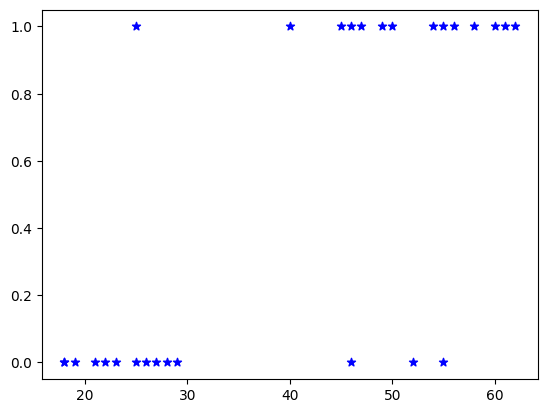

In [ ]:
plt.scatter(df.age,df.bought_insurance, marker='*', color='blue')

In [ ]:
df.shape

(28, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance, test_size=0.8)

In [ ]:
x_test

age
3    52
5    56
25   54
21   26
26   23
23   45
9    61
11   28
15   55
16   25
19   18
4    46
1    25
8    62
6    55
17   58
10   18
0    22
7    60
20   21
18   19
27   46
24   50

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.predict(x_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1])

In [ ]:
model.predict_proba(x_test)

array([[5.36874393e-05, 9.99946313e-01],
       [5.50144624e-06, 9.99994499e-01],
       [1.71862122e-05, 9.99982814e-01],
       [9.93146562e-01, 6.85343815e-03],
       [9.98751783e-01, 1.24821720e-03],
       [2.88483270e-03, 9.97115167e-01],
       [3.18939415e-07, 9.99999681e-01],
       [9.78897175e-01, 2.11028252e-02],
       [9.72364793e-06, 9.99990276e-01],
       [9.96110904e-01, 3.88909599e-03],
       [9.99927551e-01, 7.24486338e-05],
       [1.63422109e-03, 9.98365779e-01],
       [9.96110904e-01, 3.88909599e-03],
       [1.80448829e-07, 9.99999820e-01],
       [9.72364793e-06, 9.99990276e-01],
       [1.76104367e-06, 9.99998239e-01],
       [9.99927551e-01, 7.24486338e-05],
       [9.99293404e-01, 7.06596416e-04],
       [5.63718481e-07, 9.99999436e-01],
       [9.99600101e-01, 3.99899181e-04],
       [9.99871956e-01, 1.28044297e-04],
       [1.63422109e-03, 9.98365779e-01],
       [1.67699413e-04, 9.99832301e-01]])

In [ ]:
model.score(x_test,y_test)

0.8260869565217391

In [ ]:
model.coef_

array([[0.56955406]])

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
x_train_scaled = x_train.copy()
x_train_scaled['age'] = x_train_scaled['age']/100

x_test_scaled = x_test.copy()
x_test_scaled['age'] = x_test_scaled['age']/100

In [ ]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(5, 1)
(23, 1)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,),activation='sigmoid', kernel_initializer='ones',bias_initializer='zeros')
])

model.compile(optimizer="sgd", loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train, epochs = 10, verbose=1, validation_data = (x_test_scaled, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 0.6324 - val_accuracy: 0.4783 - val_loss: 0.6688
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.6000 - loss: 0.6324 - val_accuracy: 0.4783 - val_loss: 0.6688
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.6000 - loss: 0.6324 - val_accuracy: 0.4783 - val_loss: 0.6688
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.6000 - loss: 0.6324 - val_accuracy: 0.4783 - val_loss: 0.6688
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.6000 - loss: 0.6324 - val_accuracy: 0.4783 - val_loss: 0.6688
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6000 - loss: 0.6324 - val_accuracy: 0.4783 - val_loss: 0.6688
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.6000 - loss: 0.6323 - val_accuracy: 0.4783 - val_loss: 0.6688
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.6000 - loss: 0.6323 - val_accuracy: 0.4783 - val_loss: 0.6688
Epoch 

In [ ]:
# L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(x_train, y_train)
print("L1 Regularized Accuracy:", model_l1.score(x_train_scaled, y_train))
print("L1 Coefficients:", model_l1.coef_)

# L2 Regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model_l2.fit(x_train, y_train)
print("L2 Regularized Accuracy:", model_l2.score(x_train_scaled, y_train))
print("L2 Coefficients:", model_l2.coef_)

L1 Regularized Accuracy: 0.6
L1 Coefficients: [[0.0214463]]
L2 Regularized Accuracy: 0.4
L2 Coefficients: [[0.0337724]]


POTATO DISEASE CLASSIFICATION : ASSIGNMENT 6

Import all the Dependencies

In [110]:
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

Set all the Constants

In [111]:
#Setting constants
INIT_LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 10
IMAGE_SIZE = 256
default_image_size = (IMAGE_SIZE, IMAGE_SIZE)
image_size = 0
data_dir = r"C:\Users\shash\OneDrive\Desktop\mid term\plantvillage dataset.zip"
CHANNELS=3
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE


Initializing, Exploring & Partioning the Dataset
Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training
Validation: Dataset to be tested against while training
Test: Dataset to be tested against after we trained a model

In [112]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = ds.cardinality().numpy()

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [113]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = r"C:\Users\shash\OneDrive\Desktop\mid term\plantvillage dataset.zip"

# ImageDataGenerator will automatically pick subfolders as class labels
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

all_data_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1720 images belonging to 1 classes.
Found 429 images belonging to 1 classes.
Found 2149 images belonging to 1 classes.


Reading and Partitioning the Dataset
We create a Tensorflow Dataset Object and directly read it from the directory using image_dataset_from_directory and then split it using the function we created above

In [114]:
# Load images from extracted folder
import tensorflow as tf
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "C:\\Users\\shash\\OneDrive\\Desktop\\mid term\\plantvillage dataset.zip",          # this folder should have subfolders for each class
    image_size=(256, 256),
    batch_size=32
)

# Show class names
print("Classes:", dataset.class_names)

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Found 2149 files belonging to 1 classes.
Classes: ['plantvillage dataset']


Checking the Available Classes

In [115]:
class_names = dataset.class_names
n_classes = len(class_names)
print(n_classes, class_names)

1 ['plantvillage dataset']


Displaying Some Sample Images


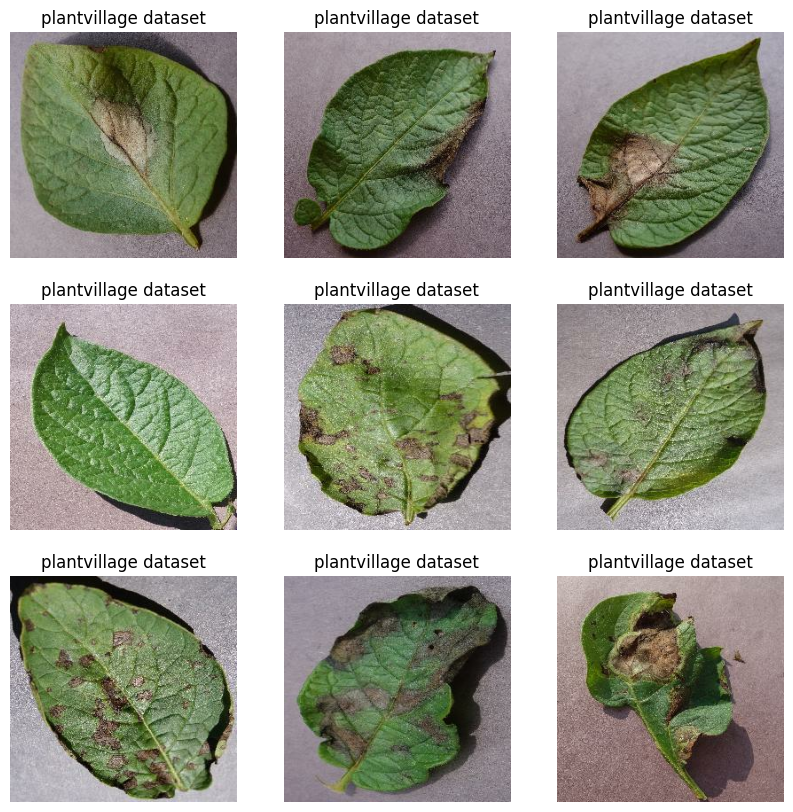

In [116]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Checking Batch Size

In [117]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


Cache, Shuffle, and Prefetch the Dataset

In [118]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

Building the Model

Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

In [119]:
from tensorflow.keras.models import Sequential
resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [120]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

Checking what is the expected dimension order for channel

In [121]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
batch_input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
chanDim = -1
if K.image_data_format() == "channels_first":
    input_shape = (CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    batch_input_shape = (BATCH_SIZE, CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    chanDim = 1

Model Architecture
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [122]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=batch_input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Summary

In [123]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (64, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (64, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (64, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (64, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (64, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (64, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (64, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (64, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (64, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (64, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (64, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (64, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (64, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (64, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (64, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (64, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,617 (717.25 KB)

 Trainable params: 183,617 (717.25 KB)

 Non-trainable params: 0 (0.00 B)

Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [124]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Training the Network

In [125]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


54/54 ━━━━━━━━━━━━━━━━━━━━ 235s 4s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 234s 4s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 227s 4s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 232s 4s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/10

Testing the Model

In [126]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_ds)
print(f"Test Accuracy: {round(scores[1],4)*100}%")

[INFO] Calculating model accuracy
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Test Accuracy: 0.0%


Plotting the Accuracy and Loss Curves

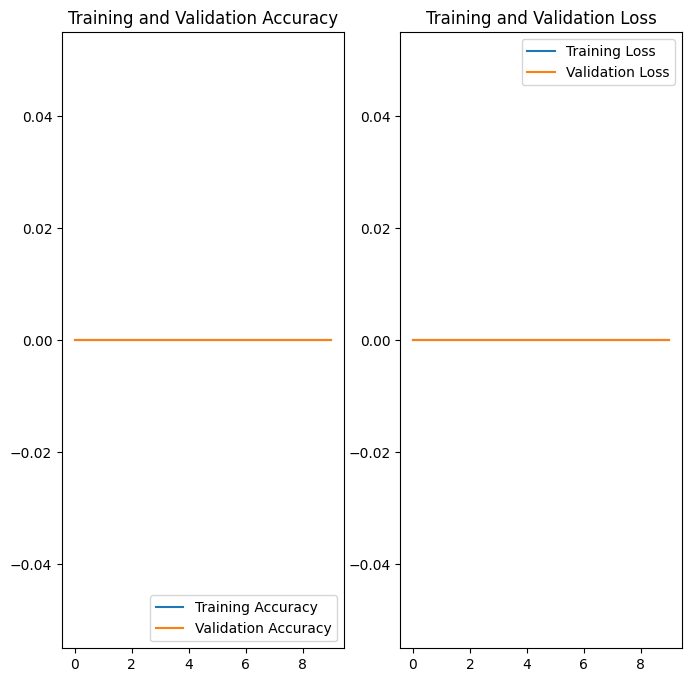

In [127]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving the Model
We append the model to the list of models as a new version

In [132]:
import os

# Define the path
model_dir = "../models"

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Determine the next model version
model_version = max([int(i) for i in os.listdir(model_dir) if i.isdigit()] + [0]) + 1

# Save the model with .keras extension
model.save(f"{model_dir}/{model_version}.keras")  # Add .keras extension here

Function for Inference

In [133]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Plotting the Inference Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


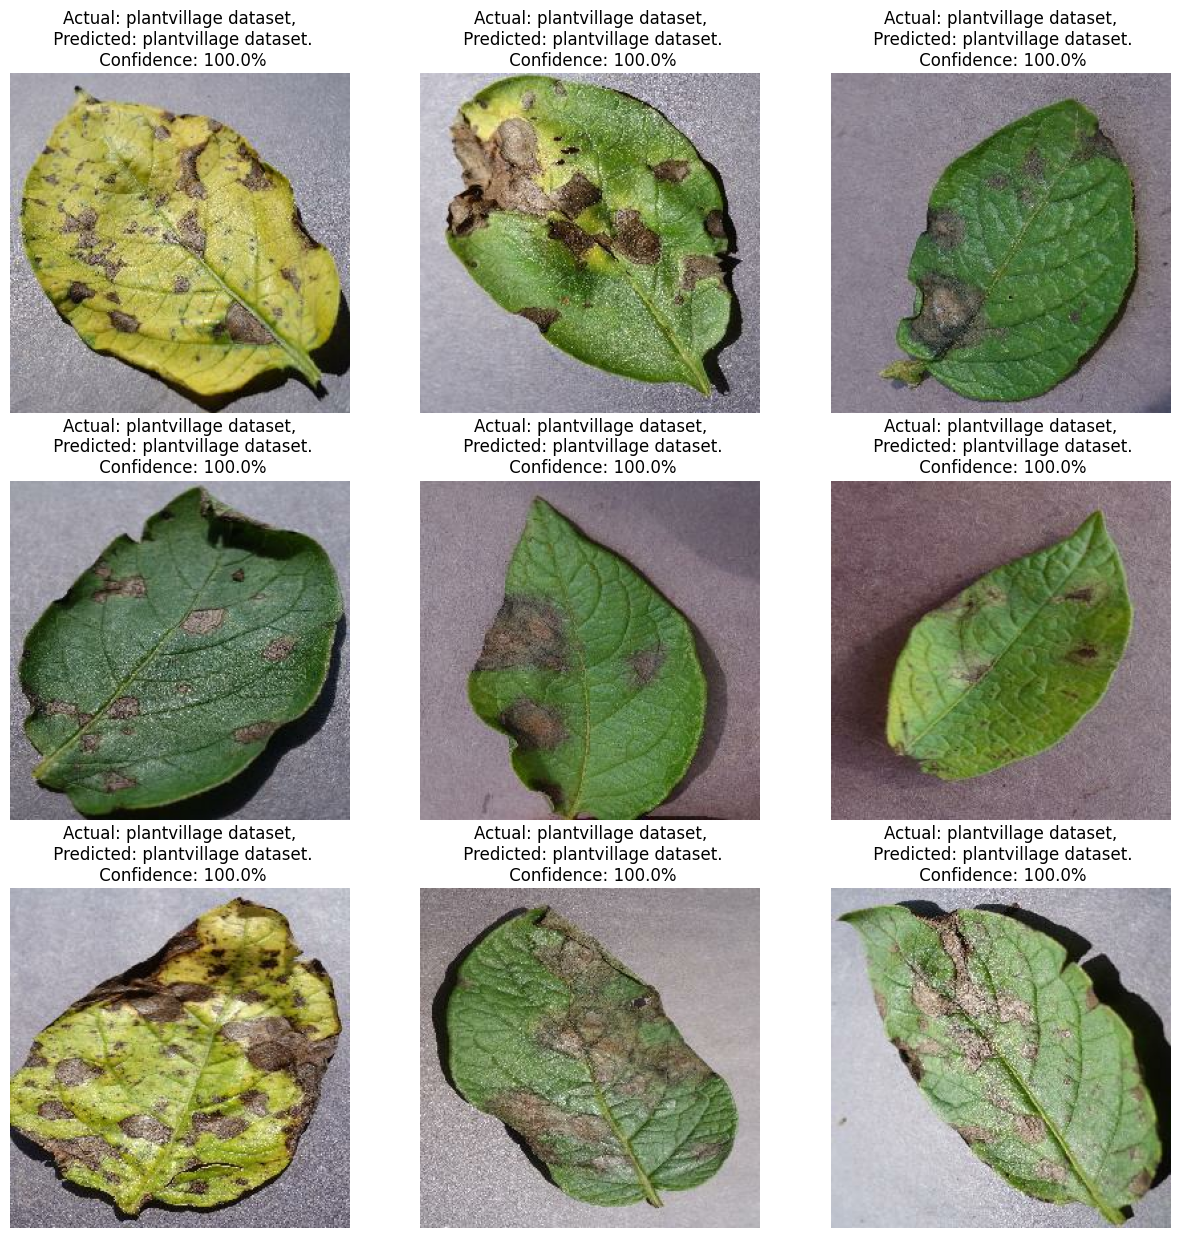

In [134]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")